In [134]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
#reading the csv file
df=pd.read_csv('train.csv')

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
#dropping irrelivent columns from dataframe.
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [138]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [139]:
#for getting information about different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [140]:
#Rounding off Fare column to one decimal place
df.Fare=df.Fare*10
df.Fare=df.Fare.astype(int)
df.Fare=df.Fare/10

In [141]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2,NaN,S
1,1,1,female,38.0,1,0,71.2,C85,C
2,1,3,female,26.0,0,0,7.9,NaN,S
3,1,1,female,35.0,1,0,53.1,C123,S
4,0,3,male,35.0,0,0,8.0,NaN,S


In [142]:
#converting text data of sex column into numeric
pd.get_dummies(df.Sex,prefix='Sex').head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [143]:
#converting text data of embarked column into numeric
pd.get_dummies(df.Embarked).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [144]:
#creating new dataframe with numeric features for sex and embarked
df_new=pd.concat([df,pd.get_dummies(df.Sex,prefix='Sex'),pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

In [145]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2,NaN,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2,C85,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9,NaN,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1,C123,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0,NaN,S,0,1,0,0,1


In [146]:
#dropping the text column for sex and embarked along with one extra column from sex and embarked, 
#as they does not give any additional information i.e they are highly correlated
df_new.drop(['Sex','Embarked','Sex_female','Embarked_Q'],axis=1,inplace=True)

In [147]:
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7.2,NaN,1,0,1
1,1,1,38.0,1,0,71.2,C85,0,1,0
2,1,3,26.0,0,0,7.9,NaN,0,0,1
3,1,1,35.0,1,0,53.1,C123,0,0,1
4,0,3,35.0,0,0,8.0,NaN,1,0,1


In [148]:
#filling the NaN value of cabin with 0
df_new.Cabin.fillna(value=0,inplace=True)

In [149]:
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7.2,0,1,0,1
1,1,1,38.0,1,0,71.2,C85,0,1,0
2,1,3,26.0,0,0,7.9,0,0,0,1
3,1,1,35.0,1,0,53.1,C123,0,0,1
4,0,3,35.0,0,0,8.0,0,1,0,1


In [150]:
#replacing all other values with 1 usin regular expression
df_new.Cabin=df_new.Cabin.str.replace('[A-Z].*','1')

In [151]:
df_new.Cabin.fillna(value=0,inplace=True)
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7.2,0,1,0,1
1,1,1,38.0,1,0,71.2,1,0,1,0
2,1,3,26.0,0,0,7.9,0,0,0,1
3,1,1,35.0,1,0,53.1,1,0,0,1
4,0,3,35.0,0,0,8.0,0,1,0,1


In [152]:
#converting the value of cabin from string to int
df_new.Cabin=df_new.Cabin.astype(int)

In [153]:
#getting info about all column.we can see that all column is now converted into int
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Cabin         891 non-null int32
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int32(1), int64(4), uint8(3)
memory usage: 47.9 KB


In [154]:
#seperating the response and feature vector,here X is feature
X=df_new.drop(['Survived'],axis=1)

In [155]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,22.0,1,0,7.2,0,1,0,1
1,1,38.0,1,0,71.2,1,0,1,0
2,3,26.0,0,0,7.9,0,0,0,1
3,1,35.0,1,0,53.1,1,0,0,1
4,3,35.0,0,0,8.0,0,1,0,1


In [156]:
#here y is response
y=df_new.Survived

In [157]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [158]:
#importing train_test_split from sklearn.linear model
from sklearn.model_selection import train_test_split

In [159]:
#splitting into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [160]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [161]:
#getting info about training set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
Pclass        712 non-null int64
Age           572 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
Cabin         712 non-null int32
Sex_male      712 non-null uint8
Embarked_C    712 non-null uint8
Embarked_S    712 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 38.2 KB


In [162]:
#filling the value of nan value in age column with mean of age.
temp=X_train.Age.mean()
temp

29.498846153846156

In [163]:
X_train.Age.fillna(value=29,inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [164]:
#new X_trtain
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
331,1,45.5,0,0,28.5,1,1,0,1
733,2,23.0,0,0,13.0,0,1,0,1
382,3,32.0,0,0,7.9,0,1,0,1
704,3,26.0,1,0,7.8,0,1,0,1
813,3,6.0,4,2,31.2,0,0,0,1


In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
Pclass        712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
Cabin         712 non-null int32
Sex_male      712 non-null uint8
Embarked_C    712 non-null uint8
Embarked_S    712 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 38.2 KB


In [166]:
#filling the nan value in test data with mean of age
temp=X_test.Age.mean()
temp

30.505845070422534

In [167]:
X_test.Age.fillna(value=31,inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [168]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 9 columns):
Pclass        179 non-null int64
Age           179 non-null float64
SibSp         179 non-null int64
Parch         179 non-null int64
Fare          179 non-null float64
Cabin         179 non-null int32
Sex_male      179 non-null uint8
Embarked_C    179 non-null uint8
Embarked_S    179 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 9.6 KB


In [169]:
#converting age from float to int
X_train.Age=X_train.Age.astype(int)
X_test.Age=X_test.Age.astype(int)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [170]:
#final x_train with no NaN and all numeric value
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
331,1,45,0,0,28.5,1,1,0,1
733,2,23,0,0,13.0,0,1,0,1
382,3,32,0,0,7.9,0,1,0,1
704,3,26,1,0,7.8,0,1,0,1
813,3,6,4,2,31.2,0,0,0,1


In [171]:
#final x_train with no NaN and all numeric value
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
709,3,31,1,1,15.2,0,1,1,0
439,2,31,0,0,10.5,0,1,0,1
840,3,20,0,0,7.9,0,1,0,1
720,2,6,0,1,33.0,0,0,0,1
39,3,14,1,0,11.2,0,0,1,0


In [172]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [173]:
#instantiating random forest classifier
rn=RandomForestClassifier()

In [174]:
#fitting the random forest classifier
rn.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [175]:
#predicting the result
pred=rn.predict(X_test)

In [176]:
#importing accuracy score from metrics to evaluate the accuracy of the model
from sklearn.metrics import accuracy_score

In [177]:
score=accuracy_score(y_test,pred)

In [178]:
#accuracy given by randomforest
score

0.8212290502793296

### Now preparing the original dataframe to be used for k_fold_crossvalidation

In [179]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Cabin         891 non-null int32
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 41.0 KB


In [180]:
#filling the nan value of age
X.Age.mean()

29.69911764705882

In [181]:
X.Age=X.Age.fillna(value=30)

In [182]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,22.0,1,0,7.2,0,1,0,1
1,1,38.0,1,0,71.2,1,0,1,0
2,3,26.0,0,0,7.9,0,0,0,1
3,1,35.0,1,0,53.1,1,0,0,1
4,3,35.0,0,0,8.0,0,1,0,1


In [183]:
#converting age to int from float
X.Age=X.Age.astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Cabin         891 non-null int32
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(1), int32(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [184]:
y.shape

(891,)

In [185]:
#calculating the accuracy of random forest foe different value of hyperparameter n_estimator
from sklearn.model_selection import cross_val_score
n_estimator_list=list(range(5,50,5))
a=[]
for i in n_estimator_list:
    rn=RandomForestClassifier(n_estimators=i)
    scores=cross_val_score(rn,X,y,cv=10)
    a.append(scores.mean())
print(a)    

[0.7959261150834184, 0.8104710021563954, 0.8239036431733062, 0.8160762115537397, 0.8172125751901034, 0.816113948473499, 0.8115693451367608, 0.8194345136760866, 0.8093601747815231]


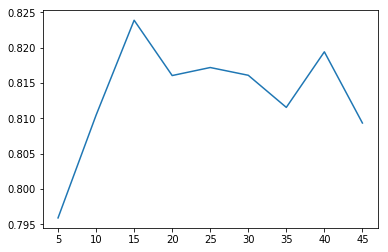

In [186]:
#plotting a graph to show relation between n_estimator and accuracy score
plt.plot(n_estimator_list,a)

In [187]:
#calculating the accuracy of random forest for different value of hyperparameter max_depth
depth_list=list(range(2,10,1))
b=[]
for i in depth_list:
    rn=RandomForestClassifier(n_estimators=10,max_depth=i)
    scores=cross_val_score(rn,X,y,cv=10)
    b.append(scores.mean())
print(b)   

[0.7611553739643627, 0.8058750425604359, 0.8137413460447169, 0.8126552037226196, 0.819409544887073, 0.8148893428668709, 0.8160515265009647, 0.818247644989218]


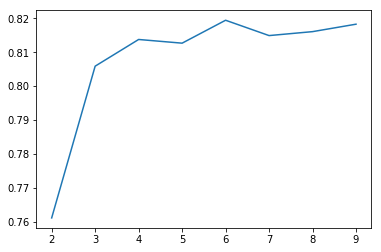

In [188]:
#plotting a graph to show relation between n_estimator and accuracy score
plt.plot(depth_list,b)

In [189]:
#instantiating random forest with optimal value of n_estimator and max_depth found by two upper plots
rn=RandomForestClassifier(n_estimators=10,max_depth=6)

In [190]:
#fitting random forest
rn.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [191]:
#reading the test data to which we have to submit the results
test_df=pd.read_csv('test.csv')

In [192]:
#first five rows of test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [193]:
#shape of test data
test_df.shape

(418, 11)

In [194]:
temp=test_df

In [195]:
#dropping irrelevent columns which might not be useful in predicting the response
test_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [196]:
#getting info about test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [197]:
#we have some inf value in fare and age columns,which can't be handled by fillna function of pandas 
#so first we will have to convert that inf into nan,that's what "use_inf_as_null" does
with pd.option_context('mode.use_inf_as_null', True):
   test_df.Fare.fillna(value=test_df.Fare.mean(),inplace=True)

In [198]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [199]:
#doing the same thing toage column
with pd.option_context('mode.use_inf_as_null', True):
   test_df.Age.fillna(value=test_df.Age.mean(),inplace=True)

In [200]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [201]:
#rounding fare to one decimal place
test_df.Fare=test_df.Fare*10
test_df.Fare=test_df.Fare.astype(int)
test_df.Fare=test_df.Fare/10

In [202]:
#converting age from float to int
test_df.Age=test_df.Age.astype(int)

In [203]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34,0,0,7.8,NaN,Q
1,3,female,47,1,0,7.0,NaN,S
2,2,male,62,0,0,9.6,NaN,Q
3,3,male,27,0,0,8.6,NaN,S
4,3,female,22,1,1,12.2,NaN,S


In [204]:
##creating new dataframe with numeric features for sex and embarked
test_df=pd.concat([test_df,pd.get_dummies(test_df.Sex,prefix='Sex'),pd.get_dummies(test_df.Embarked,prefix='Embarked')],axis=1)

In [205]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34,0,0,7.8,NaN,Q,0,1,0,1,0
1,3,female,47,1,0,7.0,NaN,S,1,0,0,0,1
2,2,male,62,0,0,9.6,NaN,Q,0,1,0,1,0
3,3,male,27,0,0,8.6,NaN,S,0,1,0,0,1
4,3,female,22,1,1,12.2,NaN,S,1,0,0,0,1


In [206]:
##dropping the text column for sex and embarked along with one extra column from sex and embarked, 
#as they does not give any additional information i.e they are highly correlated
test_df.drop(['Sex','Sex_female','Embarked','Embarked_Q'],axis=1,inplace=True)

In [207]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,34,0,0,7.8,NaN,1,0,0
1,3,47,1,0,7.0,NaN,0,0,1
2,2,62,0,0,9.6,NaN,1,0,0
3,3,27,0,0,8.6,NaN,1,0,1
4,3,22,1,1,12.2,NaN,0,0,1


In [208]:
##replacing all other values with 1 usin regular expression
test_df.Cabin=test_df.Cabin.str.replace('[A-Z].*','1')
test_df.Cabin=test_df.Cabin.fillna(value=0)

In [209]:
test_df.head(10)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,34,0,0,7.8,0,1,0,0
1,3,47,1,0,7.0,0,0,0,1
2,2,62,0,0,9.6,0,1,0,0
3,3,27,0,0,8.6,0,1,0,1
4,3,22,1,1,12.2,0,0,0,1
5,3,14,0,0,9.2,0,1,0,1
6,3,30,0,0,7.6,0,0,0,0
7,2,26,1,1,29.0,0,1,0,1
8,3,18,0,0,7.2,0,0,1,0
9,3,21,2,0,24.1,0,1,0,1


In [210]:
#cheking the no. of one and zeros
test_df.Cabin.value_counts()

0    327
1     91
Name: Cabin, dtype: int64

In [211]:
#predicting result using random_forest
pred_class_rn=rn.predict(test_df)

In [212]:
temp=pd.read_csv('test.csv')

In [213]:
#converting the predicted response into detaframe for submission
predictions=pd.DataFrame({'PassengerId':temp.PassengerId,'Survived':pred_class_rn}).to_csv('predictions_rn_11.csv',index=False)

In [214]:
#importing gradient boosting clasifier
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,22,1,0,7.2,0,1,0,1
1,1,38,1,0,71.2,1,0,1,0
2,3,26,0,0,7.9,0,0,0,1
3,1,35,1,0,53.1,1,0,0,1
4,3,35,0,0,8.0,0,1,0,1


In [216]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Cabin         891 non-null int32
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(1), int32(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [217]:
#creating a new feature named family by adding parents,children ans siblings
X['family']=X.SibSp+X.Parch

In [218]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S,family
0,3,22,1,0,7.2,0,1,0,1,1
1,1,38,1,0,71.2,1,0,1,0,1
2,3,26,0,0,7.9,0,0,0,1,0
3,1,35,1,0,53.1,1,0,0,1,1
4,3,35,0,0,8.0,0,1,0,1,0


In [219]:
#predicting results by gradientboosting using k_fold cross validation
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,X,y,cv=5)
print(scores.mean())

0.819369122561385


In [220]:
#predicting the result excluding family feature to check if accuracy is incresing or not
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,X.drop(['family'],axis=1),y,cv=5)
print(scores.mean())

0.8250124211509593


In [221]:
#trying different combinations of features this time keeping family and dropping sibsp and parch.
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,X.drop(['SibSp','Parch'],axis=1),y,cv=5)
print(scores.mean())

0.8238319773798517


In [222]:
#dropping three columns and then finding the accuracy
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,X.drop(['SibSp','Parch','Cabin'],axis=1),y,cv=5)
print(scores.mean())

0.8294436778380778


In [223]:
#splitting into training and testing data.
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [224]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)

(712, 10)
(179, 10)
(712,)


In [225]:
#using Grid searchCV to find the best hyperparameter learning rate for Gradient Boosting
lr=[0.01,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.85,0.90,0.95,1.0]
from sklearn.model_selection import GridSearchCV
gb=GradientBoostingClassifier(n_estimators=100)
param_grid=dict(learning_rate=lr)
grid=GridSearchCV(gb,param_grid,cv=10,scoring='accuracy',return_train_score=True)
grid.fit(train_x.drop(['SibSp','Parch'],axis=1),train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.85, 0.9, 0.95, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [226]:
#finding the best score
grid.best_score_

0.8328651685393258

In [227]:
#finding the best parameter used in finding that best score
grid.best_params_

{'learning_rate': 0.05}

In [228]:
#scores for every value of hyperparameter given as a dictionary in previous cell.
grid.grid_scores_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.82163, std: 0.05672, params: {'learning_rate': 0.01},
 mean: 0.83287, std: 0.05202, params: {'learning_rate': 0.05},
 mean: 0.82303, std: 0.04788, params: {'learning_rate': 0.1},
 mean: 0.82022, std: 0.04346, params: {'learning_rate': 0.15},
 mean: 0.82163, std: 0.04783, params: {'learning_rate': 0.2},
 mean: 0.82865, std: 0.04995, params: {'learning_rate': 0.25},
 mean: 0.82163, std: 0.04736, params: {'learning_rate': 0.3},
 mean: 0.81601, std: 0.05324, params: {'learning_rate': 0.35},
 mean: 0.81882, std: 0.05270, params: {'learning_rate': 0.4},
 mean: 0.79775, std: 0.05484, params: {'learning_rate': 0.45},
 mean: 0.80899, std: 0.04059, params: {'learning_rate': 0.5},
 mean: 0.81461, std: 0.04884, params: {'learning_rate': 0.55},
 mean: 0.80056, std: 0.04451, params: {'learning_rate': 0.6},
 mean: 0.80056, std: 0.04851, params: {'learning_rate': 0.65},
 mean: 0.80478, std: 0.05424, params: {'learning_rate': 0.7},
 mean: 0.79354, std: 0.04232, params: {'learning_rate': 0.85},

In [229]:
#finding best value of two hyperparameters this time using grid search.learning_rate and max_depth
max_depth=list(range(2,8,1))
param_grid=dict(learning_rate=lr,max_depth=max_depth)
gb=GradientBoostingClassifier(n_estimators=100)
grid=GridSearchCV(gb,param_grid,cv=10,scoring='accuracy',return_train_score=True)
grid.fit(train_x.drop(['SibSp','Parch'],axis=1),train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.85, 0.9, 0.95, 1.0], 'max_depth': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [230]:
#finding the best score
grid.best_score_

0.8328651685393258

In [231]:
#finding the best parameter used to calculate this best score
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3}

In [232]:
#scores for all combinations of hyperparameter.
grid.grid_scores_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.79073, std: 0.05455, params: {'learning_rate': 0.01, 'max_depth': 2},
 mean: 0.82163, std: 0.05672, params: {'learning_rate': 0.01, 'max_depth': 3},
 mean: 0.82584, std: 0.05414, params: {'learning_rate': 0.01, 'max_depth': 4},
 mean: 0.81742, std: 0.05263, params: {'learning_rate': 0.01, 'max_depth': 5},
 mean: 0.81320, std: 0.04986, params: {'learning_rate': 0.01, 'max_depth': 6},
 mean: 0.79494, std: 0.04880, params: {'learning_rate': 0.01, 'max_depth': 7},
 mean: 0.82865, std: 0.06841, params: {'learning_rate': 0.05, 'max_depth': 2},
 mean: 0.83287, std: 0.05202, params: {'learning_rate': 0.05, 'max_depth': 3},
 mean: 0.82584, std: 0.05022, params: {'learning_rate': 0.05, 'max_depth': 4},
 mean: 0.81461, std: 0.04565, params: {'learning_rate': 0.05, 'max_depth': 5},
 mean: 0.80197, std: 0.04943, params: {'learning_rate': 0.05, 'max_depth': 6},
 mean: 0.78090, std: 0.03544, params: {'learning_rate': 0.05, 'max_depth': 7},
 mean: 0.83006, std: 0.06680, params: {'learning_rat

In [233]:
#evaluating the result on testing set using the best parameters learned.
gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,max_depth=3)
gb.fit(train_x.drop(['SibSp','Parch'],axis=1),train_y)
pred_clas=gb.predict(test_x.drop(['SibSp','Parch'],axis=1))
accuracy_score(test_y,pred_clas)

0.8044692737430168

In [234]:
#first five of the testing data to which we have to submit the results
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,34,0,0,7.8,0,1,0,0
1,3,47,1,0,7.0,0,0,0,1
2,2,62,0,0,9.6,0,1,0,0
3,3,27,0,0,8.6,0,1,0,1
4,3,22,1,1,12.2,0,0,0,1


In [235]:
#creating family feature from sibsp and parch
test_df['family']=test_df.SibSp+test_df.Parch

In [236]:
# before predicting on the test dataframe we should first train our best model on whole data available.
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S,family
0,3,22,1,0,7.2,0,1,0,1,1
1,1,38,1,0,71.2,1,0,1,0,1
2,3,26,0,0,7.9,0,0,0,1,0
3,1,35,1,0,53.1,1,0,0,1,1
4,3,35,0,0,8.0,0,1,0,1,0


In [237]:
#training our GradientBoosing model on whole dataset
gb.fit(X.drop(['SibSp','Parch'],axis=1),y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [238]:
#test df with new added feature 'family'.
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S,family
0,3,34,0,0,7.8,0,1,0,0,0
1,3,47,1,0,7.0,0,0,0,1,1
2,2,62,0,0,9.6,0,1,0,0,0
3,3,27,0,0,8.6,0,1,0,1,0
4,3,22,1,1,12.2,0,0,0,1,2


In [239]:
#predicting the final response from gradientboosting 
final_pred=gb.predict(test_df.drop(['SibSp','Parch'],axis=1))

In [240]:
#converting the response into Dataframe or csv file to submit it to kaggle.
predictions=pd.DataFrame({'PassengerId':temp.PassengerId,'Survived':final_pred}).to_csv('predictions_gb_13.csv',index=False)

In [241]:
from sklearn.linear_model import LogisticRegression

In [242]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S,family
0,3,22,1,0,7.2,0,1,0,1,1
1,1,38,1,0,71.2,1,0,1,0,1
2,3,26,0,0,7.9,0,0,0,1,0
3,1,35,1,0,53.1,1,0,0,1,1
4,3,35,0,0,8.0,0,1,0,1,0


In [243]:
#checking the accuracy of logisticregression on training data
lg=LogisticRegression(C=1.0)
scores=cross_val_score(lg,X.drop(['SibSp','Parch'],axis=True),y,cv=10)
print(scores.mean())

0.7968871297242084


In [244]:
#training lg on whole data
lg.fit(X.drop(['SibSp','Parch'],axis=1),y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [245]:
#predicting the final response using logistic regression
pred_class_lg=lg.predict(test_df.drop(['SibSp','Parch'],axis=1))

In [246]:
#predicted response by logisticregression
pred_class_lg

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [247]:
#predicted response by Gradient Boosting
pred_class_gb=final_pred
pred_class_gb

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [248]:
#predictyed response by random forest
pred_class_rn

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [249]:
#converting all the responses from three models into dataframe to apply maxVoting ensambling technique
predicted_df=pd.DataFrame({'pred_class_gb':pred_class_gb,'pred_class_rn':pred_class_rn,'pred_class_lg':pred_class_lg})

In [250]:
predicted_df.head(5)

,pred_class_gb,pred_class_rn,pred_class_lg
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,1


In [251]:
#generating new predicted response by takin response which is in majority.i.e takin the mode value of the predicted response
final_pred_clas=predicted_df.mode(axis=1,numeric_only=True)
final_pred_clas.head()  

,0
0,0
1,0
2,0
3,0
4,0


In [252]:
#finally converting into numpy array to submit it to kaggle
final_pred_arr=np.resize(final_pred_clas,(418,))
final_pred_arr

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [253]:
#converting numpy array into csv file or dataFrame.this file we can submit as our final response to kaggle.
predictions=pd.DataFrame({'PassengerId':temp.PassengerId,'Survived':final_pred_arr}).to_csv('predictions_max_voting_14.csv',index=False)

#### After the submission i got an accuracy of 0.77990 which is top 50% score.
#### rank comes out to be 5126 out of 10,416 teams.

#### ---

#### some guidelines and suggestion on how to increse the accuracy score will be very helpful.
#### thanks